In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

# Breast Cancer Wisconsin (Diagnostic)

As features do conjunto de dados são extraídas de imagens digitalizadas a partir de um exame 

In [2]:
df = pd.read_csv("../data/wisconsin_breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
unique_values = df["Unnamed: 32"].unique()
unique_values

array([nan])

In [4]:
# coluna "Unnamed: 32" possui somente NaN
# coluna "id" é um identificador único para cada linha, nõa necesária para o treinamento
df = df.drop(columns=["Unnamed: 32", "id"])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Podemos separar o conjunto de dados entre variáveis da entrada (**X**) e a variável alvo (**diagnosis**)

In [6]:
X, y = df.drop(columns=["diagnosis"]), df["diagnosis"]
X.shape, y.shape

((569, 30), (569,))

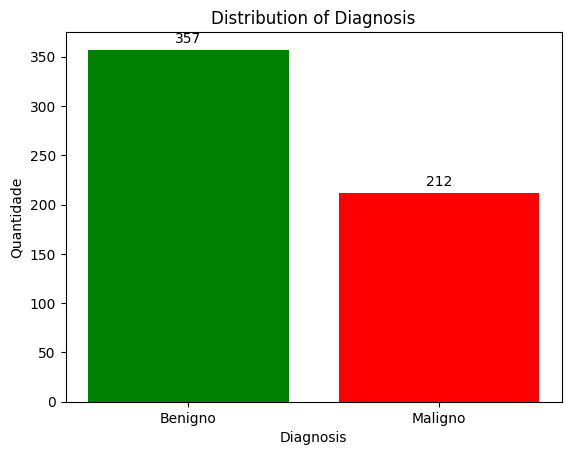

In [6]:
# Map the values in y to 'maligno' and 'benigno'
y_mapped = y.map({'M': 'Maligno', 'B': 'Benigno'})

# Count the occurrences of each class
counts = y_mapped.value_counts()

# Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(counts.index, counts.values, color=['green', 'red'])

# Annotate the bars with the counts
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.set_ylabel('Quantidade')
ax.set_xlabel('Diagnosis')
ax.set_title('Distribution of Diagnosis')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Visualizando os dados


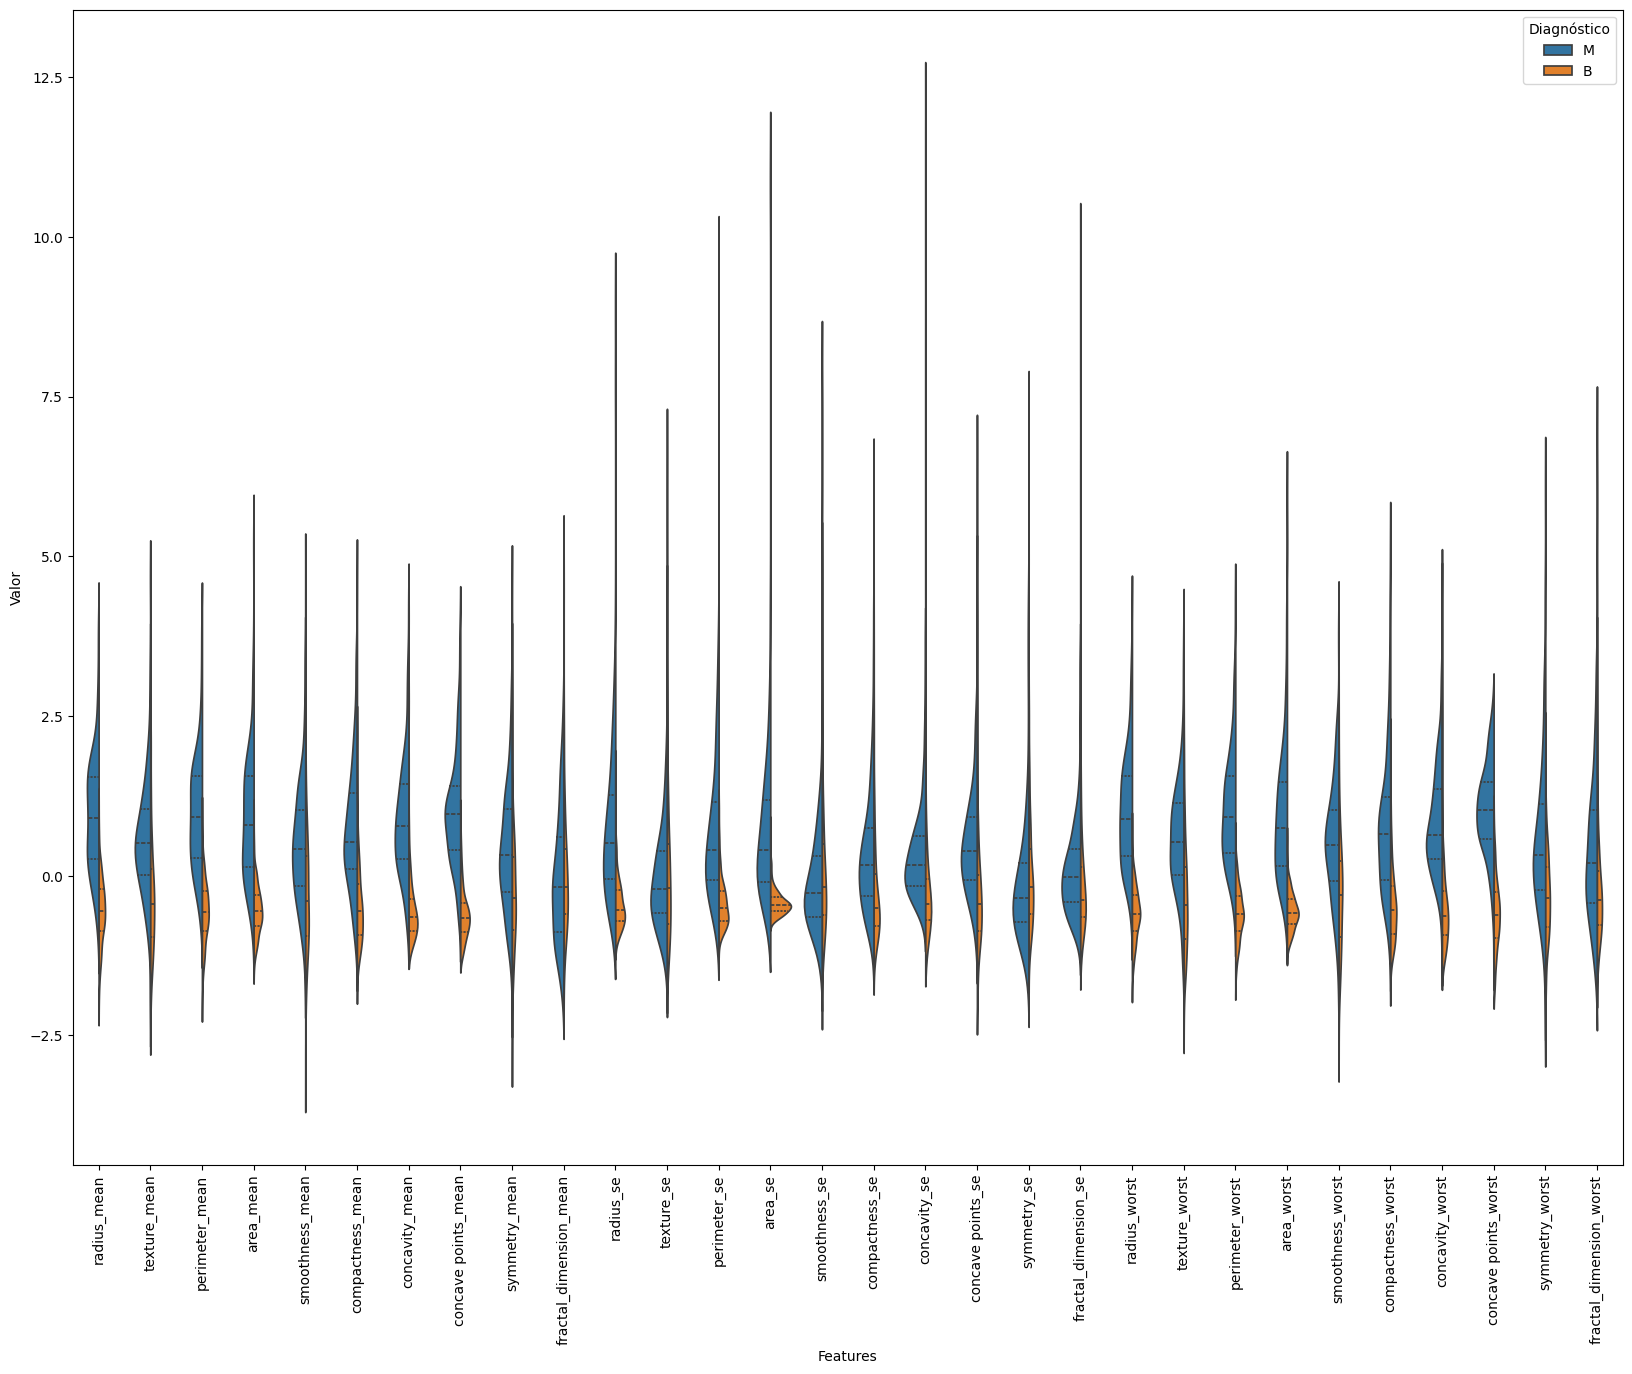

In [15]:
data_diagnostic = y
data = X
std_data = (data - data.mean()) / (data.std())  # standardization

data = pd.concat([y, std_data], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(20, 15))
sns.violinplot(
    x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart"
)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Valor")
plt.legend(title="Diagnóstico")
plt.show()

In [39]:
nan_columns = df.columns[df.isna().any()].tolist()
print(f"Columns with NaN values: {nan_columns}")

Columns with NaN values: []


In [22]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # convertendo de Maligno e Benigno para 1 e 0

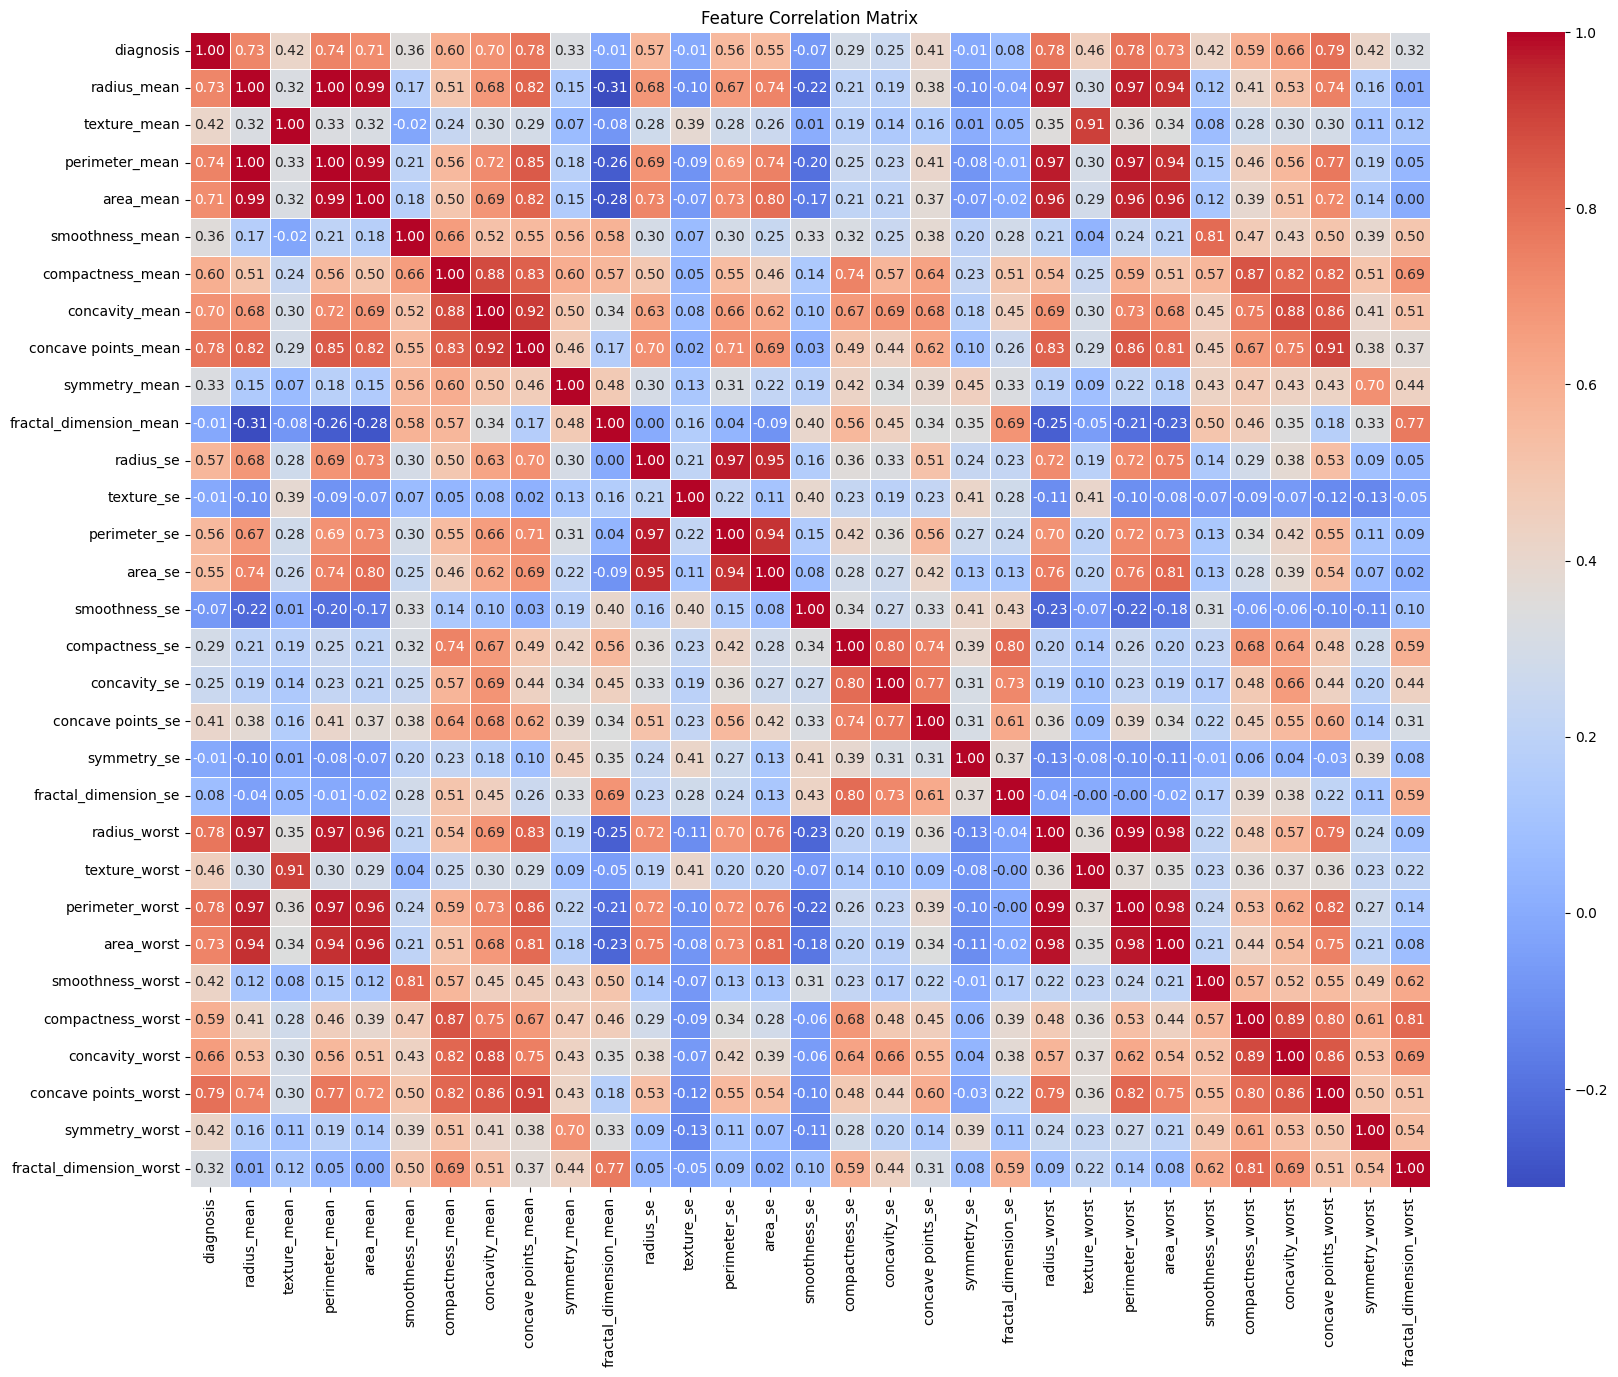

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# Calculate the correlation matrix

corr_matrix = df.corr()

# # Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

### Análise visual dos dados
Considerando as correlações lineares e demais visualizações, pode-se notar forte relação entre diversas `features` do dataset, sendo portanto possível remover algumas colunas experimentalmente.
Abaixo, estão apresentadas algumas features que serão agrupadas em apenas uma.

- *radius_mean*, *perimeter_mean* e *area_mean* -> **area_mean**
- *compactness_mean*, *concavity_mean* e *concave points_mean* -> **concave points_mean**
- *radius_se*, *perimeter_se* e *area_se* -> **area_se**
- *radius_worst*, *perimeter_worst* e *area_worst* -> **area_worst**
- *concavity_se* e *concave points_se* -> **concave points_se**

# Limpeza e transformações dos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/wisconsin_breast_cancer.csv")

df = df.drop(
    columns=["Unnamed: 32", "id"]
)  # coluna de NaN e identificador que não deve ser usado
df["diagnosis"] = df["diagnosis"].map(
    {"M": 1, "B": 0}
)  # convertendo de Maligno e Benigno para 1 e 0

# lista de colunas redundantes
drop_list = [
    "perimeter_mean",
    "radius_mean",
    "concavity_mean",
    "radius_se",
    "perimeter_se",
    "radius_worst",
    "perimeter_worst",
    "concavity_se",
    "area_worst",
    "texture_worst",
    "concave points_worst"
]
df = df.drop(columns=drop_list, inplace=False)

df.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1,17.77,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1,21.25,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1,20.38,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1,14.34,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [2]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

corr_matrix = df_scaled.corr()

# # Plot the heatmap
# plt.figure(figsize=(20, 15))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# plt.title('Feature Correlation Matrix')
# plt.show()

In [3]:
print(f"Formato dos dados: {df_scaled.shape[0]} linhas e {df_scaled.shape[1]} colunas")

Formato dos dados: 569 linhas e 20 colunas


## Preparando os conjuntos de dados

Divisão do conjunto de dados em `treino` (**75%** dos dados) e `teste` (**25%** dos dados)

In [4]:
from sklearn.model_selection import train_test_split

X, y = df_scaled.drop(columns=["diagnosis"]), df_scaled["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Size of training set: {X_train.shape[0]} samples\nSize of test set: {X_test.shape[0]} amostras")

Size of training set: 426 samples
Size of test set: 143 amostras


# Treinando um modelo

In [2]:
from models import MLP
from nn import tanh
from metrics import rmse

model = MLP(X_train.shape[1], [24, 8, 1], activation_fn=tanh)

EPOCHS = 35
LR = 0.05

In [ ]:
import time

# Training loop
start_time = time.time()

for epoch in range(EPOCHS):
    y_pred_train = [model(x) for x in X_train.values]

    loss = rmse(y_pred_train, y_train.values)

    for p in model.parameters():
        p.grad = 0

    loss.backward()

    for p in model.parameters():
        p.data -= LR * p.grad
    
    if epoch % 5 == 0:
        elapsed_time = time.time() - start_time
        print(f"Epoch {epoch + 1} Loss: {loss.data} Time elapsed: {elapsed_time:.2f} seconds")
        start_time = time.time()
        
# loss final do treinamento: 0.3086404105646005 (RMSE)

Epoch 0 Loss: 0.5947550132305658 Time elapsed: 7.59 seconds
Epoch 1 Loss: 0.5758492986682473 Time elapsed: 16.14 seconds
Epoch 2 Loss: 0.5577585281131674 Time elapsed: 17.97 seconds
Epoch 3 Loss: 0.5425542200203679 Time elapsed: 13.92 seconds
Epoch 4 Loss: 0.528367010471238 Time elapsed: 13.22 seconds
Epoch 5 Loss: 0.5153469460234502 Time elapsed: 69.91 seconds
Epoch 6 Loss: 0.5031430141299835 Time elapsed: 29.42 seconds
Epoch 7 Loss: 0.49139948393324717 Time elapsed: 16.31 seconds
Epoch 8 Loss: 0.4806035032986658 Time elapsed: 16.76 seconds
Epoch 9 Loss: 0.47013952498855116 Time elapsed: 18.11 seconds
Epoch 10 Loss: 0.4600073924748493 Time elapsed: 78.97 seconds
Epoch 11 Loss: 0.44986753435084065 Time elapsed: 27.90 seconds
Epoch 12 Loss: 0.44059426746611785 Time elapsed: 15.76 seconds
Epoch 13 Loss: 0.43159664451121404 Time elapsed: 16.14 seconds
Epoch 14 Loss: 0.42328670236369215 Time elapsed: 12.82 seconds
Epoch 15 Loss: 0.41460110256065447 Time elapsed: 73.41 seconds
Epoch 16 Loss

Final Precision: 0.7205882352941176
Final Recall: 0.9074074074074074
Final F1: 0.8032786885245902
Confusion Matrix:
[[70 19]
 [ 5 49]]


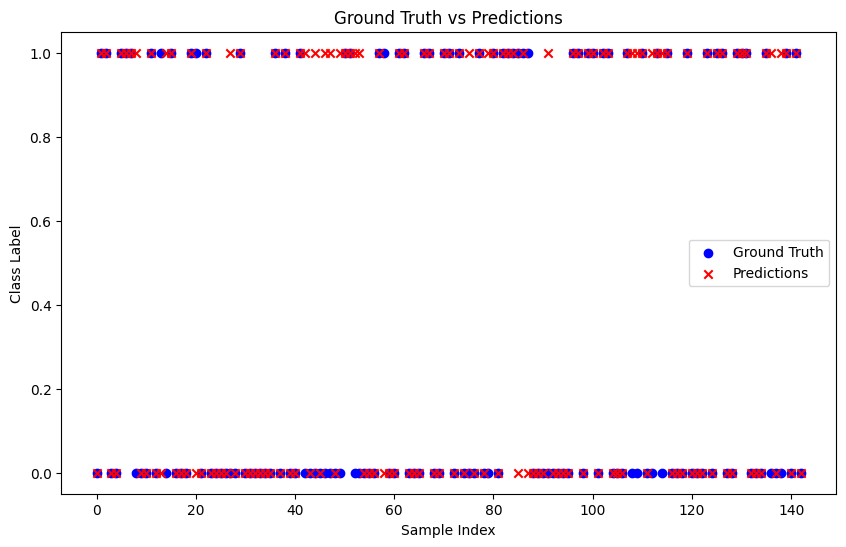

In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred_test = [model(x) for x in X_test.values]
y_pred_labels = [1 if y.data > 0.5 else 0 for y in y_pred_test]  # for tanh

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, pos_label=1)
recall = recall_score(y_test, y_pred_labels, pos_label=1)
f1 = f1_score(y_test, y_pred_labels, pos_label=1)

print(f"Final Precision: {precision}")
print(f"Final Recall: {recall}")
print(f"Final F1: {f1}")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot predictions and ground truth
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Ground Truth')
plt.scatter(range(len(y_pred_labels)), y_pred_labels, color='red', label='Predictions', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Ground Truth vs Predictions')
plt.legend()
plt.show()

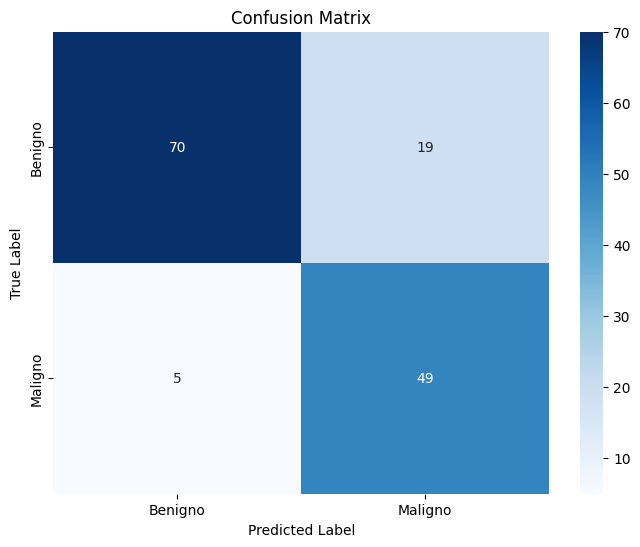

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

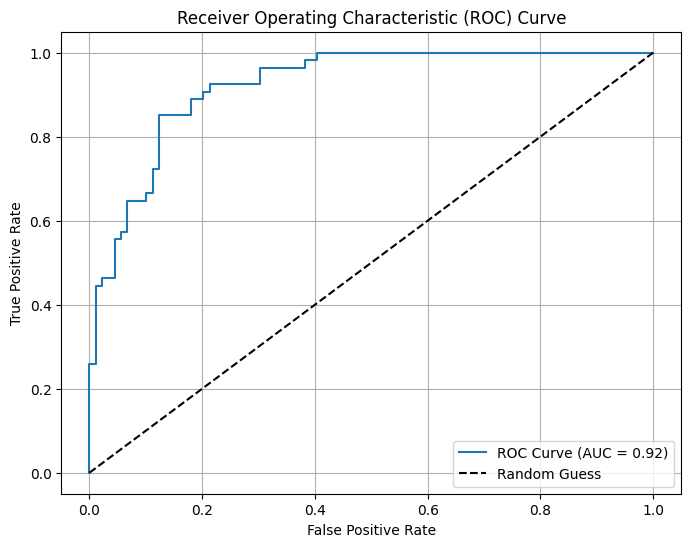

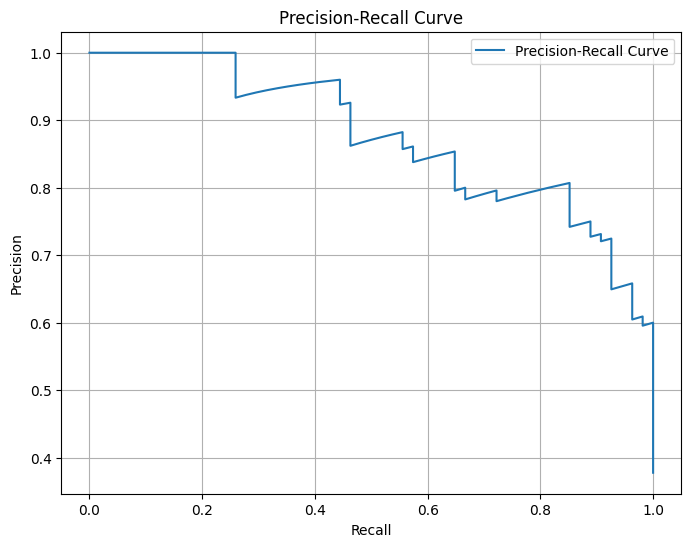

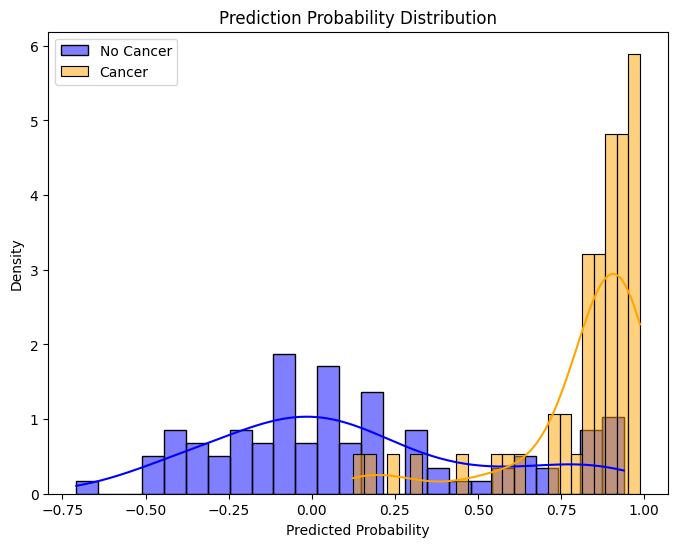

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

y_pred_test_v = list(map(lambda x: x.data, y_pred_test))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test_v)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_test_v)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Prediction Distribution
plt.figure(figsize=(8, 6))
y_test_array = y_test.values
sns.histplot([y_pred_test_v[i] for i in range(len(y_test_array)) if y_test_array[i] == 0], bins=25, color='blue', label='Benigno', kde=True, stat='density')
sns.histplot([y_pred_test_v[i] for i in range(len(y_test_array)) if y_test_array[i] == 1], bins=25, color='orange', label='Maligno', kde=True, stat='density')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Prediction Probability Distribution')
plt.legend()
plt.show()

### Usando `MSE` como métrica de custo

#### Definindo novamente o conjunto de dados

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/wisconsin_breast_cancer.csv")

df = df.drop(
    columns=["Unnamed: 32", "id"]
)  # coluna de NaN e identificador que não deve ser usado
df["diagnosis"] = df["diagnosis"].map(
    {"M": 1, "B": 0}
)  # convertendo de Maligno e Benigno para 1 e 0

# lista de colunas redundantes
drop_list = [
    "perimeter_mean",
    "radius_mean",
    "concavity_mean",
    "radius_se",
    "perimeter_se",
    "radius_worst",
    "perimeter_worst",
    "concavity_se",
    "area_worst",
    "texture_worst",
    "concave points_worst"
]
df = df.drop(columns=drop_list, inplace=False)

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

corr_matrix = df_scaled.corr()

from sklearn.model_selection import train_test_split

X, y = df_scaled.drop(columns=["diagnosis"]), df_scaled["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Size of training set: {X_train.shape[0]} samples\nSize of test set: {X_test.shape[0]} amostras")

Size of training set: 426 samples
Size of test set: 143 amostras


#### Definiação do modelo, treinamento e teste

In [35]:
from models import MLP
from nn import tanh
from metrics import mse

model = MLP(X_train.shape[1], [24, 8, 1], activation_fn=tanh)

EPOCHS = 35
LR = 0.05

In [ ]:
import time

# Training loop
start_time = time.time()

for epoch in range(EPOCHS):
    y_pred_train = [model(x) for x in X_train.values]

    loss = mse(y_pred_train, y_train.values)

    for p in model.parameters():
        p.grad = 0

    loss.backward()

    for p in model.parameters():
        p.data -= LR * p.grad
    
    if epoch % 5 == 0:
        elapsed_time = time.time() - start_time
        print(f"Epoch {epoch + 1} Loss: {loss.data} Time elapsed: {elapsed_time:.2f} seconds")
        start_time = time.time()


Epoch 0 Loss: 1.1754836652768004 Time elapsed: 18.06 seconds
Epoch 5 Loss: 0.63917841840716 Time elapsed: 80.53 seconds
Epoch 10 Loss: 0.3523290997330834 Time elapsed: 82.04 seconds
Epoch 15 Loss: 0.24729982384839433 Time elapsed: 79.09 seconds
Epoch 20 Loss: 0.1923997013699687 Time elapsed: 85.36 seconds
Epoch 25 Loss: 0.1603126295852428 Time elapsed: 83.79 seconds
Epoch 30 Loss: 0.13767527985558364 Time elapsed: 80.41 seconds


Final Precision: 0.8275862068965517
Final Recall: 0.8888888888888888
Final F1: 0.8571428571428571
Confusion Matrix:
[[79 10]
 [ 6 48]]


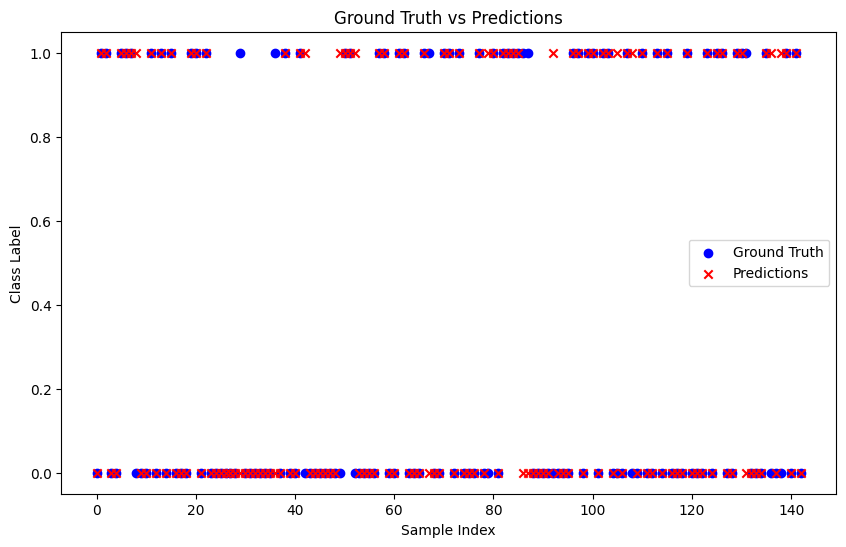

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

y_pred_test = [model(x) for x in X_test.values]
y_pred_labels = [1 if y.data > 0.5 else 0 for y in y_pred_test]  # for tanh

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_labels, pos_label=1)
recall = recall_score(y_test, y_pred_labels, pos_label=1)
f1 = f1_score(y_test, y_pred_labels, pos_label=1)

print(f"Final Precision: {precision}")
print(f"Final Recall: {recall}")
print(f"Final F1: {f1}")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)
print("Confusion Matrix:")
print(cm)

# Plot predictions and ground truth
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Ground Truth')
plt.scatter(range(len(y_pred_labels)), y_pred_labels, color='red', label='Predictions', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Ground Truth vs Predictions')
plt.legend()
plt.show()

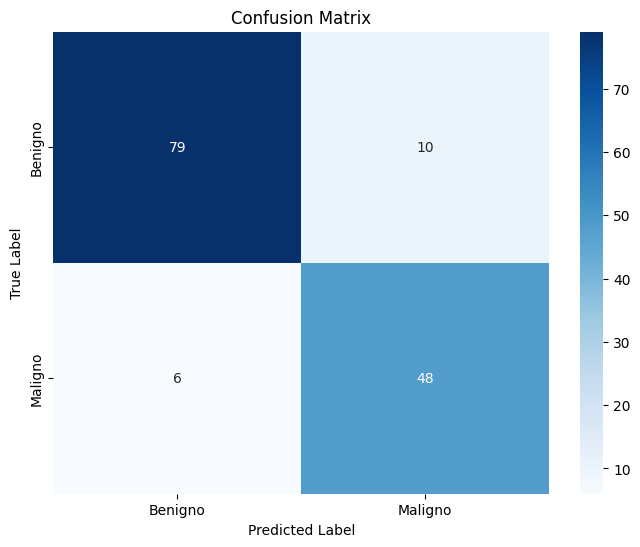

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

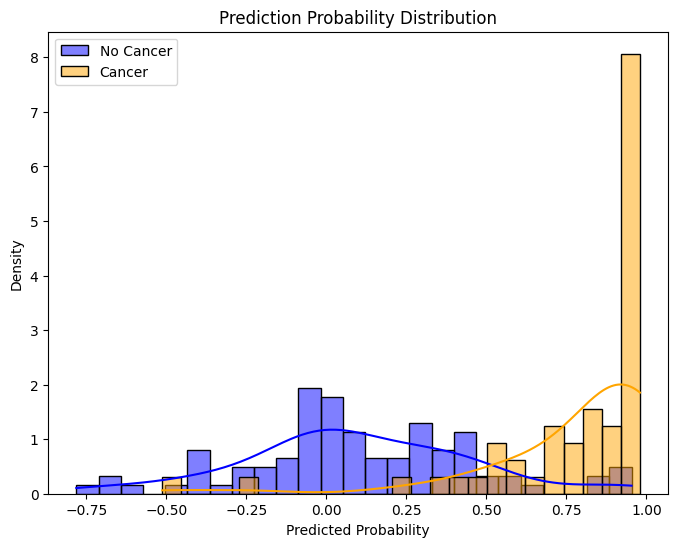

In [ ]:
y_pred_test_v = list(map(lambda x: x.data, y_pred_test))

plt.figure(figsize=(8, 6))
y_test_array = y_test.values
sns.histplot([y_pred_test_v[i] for i in range(len(y_test_array)) if y_test_array[i] == 0], bins=25, color='blue', label='Benigno', kde=True, stat='density')
sns.histplot([y_pred_test_v[i] for i in range(len(y_test_array)) if y_test_array[i] == 1], bins=25, color='orange', label='Maligno', kde=True, stat='density')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Prediction Probability Distribution')
plt.legend()
plt.show()

### Usando `sigmoid` como ativação

Os testes usando `sigmoid` como função de ativação não trouxeram resultados, de forma que ajustar o limiar para a classificação tornou-se difícil e não criando uma fronteira clara de separação das classes pelo modelo. Dessa forma, os códigos do teste e plots foram omitidos, com os resultados anteriores mostrando-se superiores e bastante satisfatórios.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/wisconsin_breast_cancer.csv")

df = df.drop(
    columns=["Unnamed: 32", "id"]
)  # coluna de NaN e identificador que não deve ser usado
df["diagnosis"] = df["diagnosis"].map(
    {"M": 1, "B": 0}
)  # convertendo de Maligno e Benigno para 1 e 0

# lista de colunas redundantes
drop_list = [
    "perimeter_mean",
    "radius_mean",
    "concavity_mean",
    "radius_se",
    "perimeter_se",
    "radius_worst",
    "perimeter_worst",
    "concavity_se",
    "area_worst",
    "texture_worst",
    "concave points_worst"
]
df = df.drop(columns=drop_list, inplace=False)

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

corr_matrix = df_scaled.corr()

from sklearn.model_selection import train_test_split

X, y = df_scaled.drop(columns=["diagnosis"]), df_scaled["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
from models import MLP
from nn import sigmoid
from metrics import rmse

model = MLP(X_train.shape[1], [24, 8, 1], activation_fn=sigmoid)

EPOCHS = 35
LR = 0.05

In [ ]:
import time

# Training loop
start_time = time.time()

for epoch in range(EPOCHS):
    y_pred_train = [model(x) for x in X_train.values]

    loss = rmse(y_pred_train, y_train.values)

    for p in model.parameters():
        p.grad = 0

    loss.backward()

    for p in model.parameters():
        p.data -= LR * p.grad
    
    if epoch % 5 == 0:
        elapsed_time = time.time() - start_time
        print(f"Epoch {epoch} Loss: {loss.data} Time elapsed: {elapsed_time:.2f} seconds")
        start_time = time.time()

Epoch 0 Loss: 0.6928506951306647 Time elapsed: 19.23 seconds
Epoch 1 Loss: 0.69149544344802 Time elapsed: 34.50 seconds
Epoch 2 Loss: 0.6901128715538615 Time elapsed: 14.96 seconds
Epoch 3 Loss: 0.6887026085115934 Time elapsed: 14.59 seconds
Epoch 4 Loss: 0.687263119372264 Time elapsed: 14.13 seconds
Epoch 5 Loss: 0.6857959891226448 Time elapsed: 77.31 seconds
Epoch 6 Loss: 0.6842985029372517 Time elapsed: 33.76 seconds
Epoch 7 Loss: 0.6827706447380042 Time elapsed: 15.84 seconds
Epoch 8 Loss: 0.6812114766484864 Time elapsed: 10.76 seconds
Epoch 9 Loss: 0.6796207090845798 Time elapsed: 18.37 seconds
Epoch 10 Loss: 0.6779969837763181 Time elapsed: 76.98 seconds
Epoch 11 Loss: 0.6763390911843261 Time elapsed: 32.12 seconds
Epoch 12 Loss: 0.6746482401454519 Time elapsed: 15.27 seconds
Epoch 13 Loss: 0.6729243446113996 Time elapsed: 15.21 seconds
Epoch 14 Loss: 0.6711648894987476 Time elapsed: 15.13 seconds
Epoch 15 Loss: 0.6693713142102317 Time elapsed: 76.12 seconds
Epoch 16 Loss: 0.6675